In [7]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
HGNC = pd.read_csv("/Users/jiayao/Work/Resources/protein-coding_gene.txt", delimiter="\t")
ENSID2Entrez = dict(zip(HGNC["ensembl_gene_id"].values, HGNC["entrez_id"].values))
GeneSymbol2Entrez = dict(zip(HGNC["symbol"].values, HGNC["entrez_id"].values))
Entrez2Symbol = dict(zip(HGNC["entrez_id"].values, HGNC["symbol"].values))
allen_mouse_genes = loadgenelist("../dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# ASD/NDD Split

In [12]:
ASC = pd.read_csv("../dat/genes/asd/asc_tada_RR.csv", index_col="gene")
NDD = pd.read_excel("/Users/jiayao/Work/ASD_Circuits/dat/genes/1-s2.0-S0092867419313984-mmc4.xlsx", sheet_name="NDD_de_novo")
ASDpNDDsplits = pd.read_excel("/Users/jiayao/Work/ASD_Circuits/dat/genes/1-s2.0-S0092867419313984-mmc4.xlsx", 
                              sheet_name="Heterogeneity")

In [15]:
ASC.columns.values

array(['hugoGene', 'hgnc_id', 'entrez_id', 'ensembl_gene_id',
       'refseq_accession', 'uniprot_ids', 'location', 'chr', 'start_hg38',
       'stop_hg38', 'strand', 'cDNA', 'exons', 'dn.ptv', 'dn.misa',
       'dn.misb', 'dbs.case.ptv', 'dbs.control.ptv', 'sweden.case.ptv',
       'sweden.control.ptv', 'case.ptv', 'control.ptv', 'mut.ptv',
       'mut.misa', 'mut.misb', 'pLI', 'gamma_dn.ptv', 'gamma_dn.misa',
       'gamma_dn.misb', 'BF_dn.ptv', 'BF_dn.misa', 'BF_dn.misb',
       'gamma_cc_ptv', 'rho.ptv', 'BF_cc.ptv', 'qval_dnccPTV',
       'ddidDN.ptv', 'ddidDN.misb', 'ddidDN.misa', 'asd_rate_dn',
       'asd_dn', 'ddid_dn', 'ddid_rate_dn', 'Transmitted_PTV_proband',
       'Untransmitted_PTV_proband', 'ASC33_2014', 'SSC27_2014',
       'ASC65_2015', 'ASC102_2018', 'ASD:DDID', 'ASD_vs_DDID', 'ASD53',
       'DDID49', 'Function', 'LGD_RR', 'misa_RR', 'misb_RR'], dtype=object)

In [8]:
NDD_counts = CountNDD(NDD)

In [25]:
def myASDNDDClassifier(NASD, NNDD, NASDProband=6430, NNDDProband=5264):
    if NASD/NASDProband > NNDD/NNDDProband:
        return "ASD_p"
    else:
        return "ASD_NDD"

ASDpNDDsplits = ASDpNDDsplits.head(102)
for i, row in ASDpNDDsplits.iterrows():
    gene = row["gene"]
    dnASD = row["dn.asd"]
    mycountASD = ASC.loc[gene, "dn.ptv"] + ASC.loc[gene, "dn.misa"] + ASC.loc[gene, "dn.misb"]
    dnNDD = row["dn.ndd"]
    try:
        mycountNDD = NDD_counts[gene]["All"]
    except:
        mycountNDD = 0
    _class = row["classifier"]
    myclass = myASDNDDClassifier(dnASD, dnNDD)
    print(dnASD, mycountASD, "\t", dnNDD, mycountNDD, "\t",_class, myclass)

19 19 	 5 5 	 ASD_P ASD_p
22 22 	 26 27 	 ASD_NDD ASD_NDD
14 14 	 17 17 	 ASD_NDD ASD_NDD
10 9 	 22 20 	 ASD_NDD ASD_NDD
9 9 	 14 14 	 ASD_NDD ASD_NDD
8 7 	 14 13 	 ASD_NDD ASD_NDD
10 9 	 32 31 	 ASD_NDD ASD_NDD
8 7 	 3 3 	 ASD_P ASD_p
6 6 	 19 20 	 ASD_NDD ASD_NDD
8 8 	 10 10 	 ASD_NDD ASD_NDD
6 6 	 11 11 	 ASD_NDD ASD_NDD
7 7 	 2 2 	 ASD_P ASD_p
10 5 	 2 2 	 ASD_P ASD_p
5 5 	 19 17 	 ASD_NDD ASD_NDD
4 4 	 0 0 	 ASD_P ASD_p
8 7 	 10 10 	 ASD_NDD ASD_NDD
5 4 	 33 32 	 ASD_NDD ASD_NDD
8 7 	 3 2 	 ASD_P ASD_p
6 6 	 3 2 	 ASD_P ASD_p
5 5 	 6 6 	 ASD_NDD ASD_NDD
4 4 	 15 16 	 ASD_NDD ASD_NDD
5 5 	 3 3 	 ASD_P ASD_p
5 5 	 2 1 	 ASD_P ASD_p
4 4 	 1 1 	 ASD_P ASD_p
6 3 	 17 18 	 ASD_NDD ASD_NDD
4 4 	 6 5 	 ASD_NDD ASD_NDD
4 4 	 1 1 	 ASD_P ASD_p
8 6 	 3 3 	 ASD_P ASD_p
4 3 	 6 6 	 ASD_NDD ASD_NDD
4 3 	 1 1 	 ASD_P ASD_p
5 4 	 2 1 	 ASD_P ASD_p
3 3 	 7 7 	 ASD_NDD ASD_NDD
7 7 	 6 6 	 ASD_NDD ASD_NDD
4 4 	 7 6 	 ASD_NDD ASD_NDD
3 3 	 6 3 	 ASD_NDD ASD_NDD
3 3 	 0 0 	 ASD_P ASD_p
4 2 	 4 3 	 ASD

In [ ]:
asc_asdp_gene2MutN = ASC_Gene_Weights(asc_asdp, gnomad_cons, FDR=0.1)
asc_asdndd_gene2MutN = ASC_Gene_Weights(asc_asdndd, gnomad_cons, FDR=0.1)

In [ ]:
asc_asdp_explevel_Mutcount = ExpAVGWithExpMatch(ExpMat, asc_asdp_gene2MutN, asd_asc_match_df,
                                              csv_fil = "dat/bias/asc.asdp.explevel.weighted.Mutcount.bias.csv")
RegionDistributions(asc_asdp_explevel_Mutcount.set_index("STR"))

In [ ]:
asc_asdbdd_explevel_Mutcount = ExpAVGWithExpMatch(ExpMat, asc_asdndd_gene2MutN, asd_asc_match_df,
                                              csv_fil = "dat/bias/asc.asdndd.explevel.weighted.Mutcount.bias.csv")
RegionDistributions(asc_asdbdd_explevel_Mutcount.set_index("STR"))

## SCZ GWAS TOP HITs

In [19]:
scz_gwas_gene_test = pd.read_csv("/Users/jiayao/Work/NB_proposal/dat/GWAS/GeneTest/scz.genetest.tsv", 
                                delimiter="\t")
scz_gwas_genes = scz_gwas_gene_test[scz_gwas_gene_test["P"]<5e-8]["GENE"].values
print(scz_gwas_genes.shape)

(321,)


In [26]:
scz_gwas_genes_entrez = [GeneSymbol2Entrez[x] for x in scz_gwas_genes if x in GeneSymbol2Entrez]
scz_gwas_genes_entrez = filtergenelist(scz_gwas_genes_entrez, allen_mouse_genes)
WriteGeneList(scz_gwas_genes_entrez, "../dat/genes/scz.gwas.entrez.list")

## De novo SCZ dataset (Howrigan 2020)

In [34]:
scz_denovo = pd.read_excel("/Users/jiayao/Work/ASD_Circuits/doc/41593_2019_564_MOESM8_ESM.xlsx")
scz_denovo = scz_denovo[(scz_denovo["DISEASE"] == "SCZ") & (scz_denovo["annotation_used"]!="synonymous")]

In [50]:
scz_denovo.head(2)

,CHROM,POS,REF,ALT,STUDY,DISEASE,gene_symbol_used,vep_gene,refseq_gene,cadd_gene,...,MutationAssessor_prediction,MetaSVM_prediction,MetaLR_prediction,combined_damaging_prediction,DistToSplice,Changing.ESR,frontal_cortex_DHS_peak,cerebrum_frontal_cortex_DHS_peak,cerebellum_DHS_peak,cfc_non_crb_DHS_peak
0,1,899318,CCT,C,CMB,SCZ,KLHL17,KLHL17,KLHL17,KLHL17,...,NaN,NaN,NaN,False,20.0,True,True,True,False,True
1,1,1274965,G,A,CMB,SCZ,DVL1,DVL1,DVL1,DVL1,...,medium,tolerated,tolerated,True,4.0,False,True,True,False,True


In [59]:
Genes = list(set(scz_denovo["gene_symbol_used"].values))
writer = csv.writer(open("dat/scz.denovo.counts.mutrate.txt", "wt"), delimiter="\t")
writer.writerow(["gene.id", "mut.lgd", "dn.lgd", "mut.mis", "dn.mis"]) #, "mut.all", "dn.all"])
Missed_genes = []
for gene in Genes:
    try:
        gene_df = scz_denovo[scz_denovo["gene_symbol_used"]==gene]
        n_lgd = gene_df[gene_df["annotation_used"]=="ptv"].shape[0]
        n_mis = gene_df[gene_df["annotation_used"]=="missense"].shape[0]
        n_all = n_lgd + n_mis
        rate_mis = bg.loc[gene, "p_misense"]
        rate_lgd = bg.loc[gene, "p_LGD"]
        rate_all = rate_lgd + rate_mis
        writer.writerow([gene, rate_lgd, n_lgd, rate_mis, n_mis])
    except:
        #print(gene)
        Missed_genes.append(gene)

In [48]:
bg = pd.read_csv("/Users/jiayao/Work/Resources/MutationRate_20170710_rate.txt", delimiter="\t", index_col="GeneName")
bg.head(2)

,#Reference,GeneVersion,Transcript.TranscriptVersion,ExonCount,Chr,StartPos,EndPos,p_synonymous,p_misense,p_nonsense,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.56
GeneName,,,,,,,,,,,,,,,,,,,,,
PLCXD1,>hg19,wgEncodeGencodeBasicV19,ENST00000381657,5,X,200852,216005,0.000008,0.000015,5.192486e-07,...,5.525957e-07,5.454919e-07,5.343863e-07,5.117010e-07,4.081868e-07,3.877915e-07,2.665134e-07,1.323599e-07,2.553236e-08,5.510965e-07
PPP2R3B,>hg19,wgEncodeGencodeBasicV19,ENST00000390665,12,X,295099,347429,0.000017,0.000028,1.030881e-06,...,3.744647e-06,3.082277e-06,2.537585e-06,2.274970e-06,1.627129e-06,1.317029e-06,1.074042e-06,3.170196e-07,3.219619e-08,3.546518e-06


In [60]:
# RES: /Users/jiayao/Work/ASD_Circuits/dat/TADA_v1.2/scz.tata.csv

### Get entrez ID for scz genes

In [22]:
SCZ_Genes = pd.read_csv(
        "/Users/jiayao/Work/BrainDisorders/data/psychencode/INT-17_SCZ_High_Confidence_Gene_List.csv")
SCZ_Genes_ens = SCZ_Genes["ensembl_names"].values

SCZ_Entrez = [GeneSymbol2Entrez[x] for x in SCZ_Genes_ens if x in GeneSymbol2Entrez]

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
avil_genes = pd.read_csv("dat/match-features.csv")["GENE"].values

In [24]:
avil_genes

array([        1,         2,         9, ..., 102724560, 102724652,
       102724788])

In [25]:
fout = open("dat/scz.gene.list", 'wt')
for x in SCZ_Entrez:
    x = int(x)
    if x in avil_genes:
        fout.write(str(int(x))+"\n")

In [67]:
## de novo scz
SCZ_Genes = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/dat/TADA_v1.2/scz.tata.csv")
SCZ_Genes = SCZ_Genes[SCZ_Genes["qval"]<0.5]
SCZ_Genes_symbol = SCZ_Genes["gene.id"].values
HGNC = pd.read_csv("/Users/jiayao/Work/Resources/protein-coding_gene.txt", delimiter="\t")
GeneSymbol2Entrez = dict(zip(HGNC["symbol"].values, HGNC["entrez_id"].values))
SCZ_Entrez = [GeneSymbol2Entrez[x] for x in SCZ_Genes_symbol if x in GeneSymbol2Entrez]

fout = open("dat/scz.denovo.gene.list", 'wt')
for x in SCZ_Entrez:
    x = int(x)
    if x in avil_genes:
        fout.write(str(int(x))+"\n")

### Quantile Norm expression data

In [17]:
exp_energy = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/energy-conn-model.csv",
                        index_col="ROW")
exp_energy.head()

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.089402,0.060138,0.050112,0.023204,0.034093,0.088305,0.036078,NaN,0.046813,0.032990,...,0.035584,0.179587,0.021418,0.030367,0.115622,0.036984,0.053407,0.033779,0.110354,0.134065
2,0.040017,0.014211,0.023246,0.024009,0.403265,0.025202,0.354581,0.058713,0.145883,0.022381,...,0.043141,0.005781,0.213674,0.052746,0.038968,0.016603,0.018719,0.035381,0.122850,1.065840
9,0.148632,0.026984,0.002614,0.022323,0.058371,0.011842,0.058527,0.004481,0.026373,0.290885,...,0.016260,0.003517,0.028695,0.004277,0.214487,0.014443,0.016323,0.020207,0.046851,0.162448
10,0.022789,0.277115,0.340467,0.003136,0.395426,0.017588,0.068191,0.055832,0.013445,0.001063,...,0.017032,0.046885,0.056515,0.020204,0.025072,0.014544,0.004447,0.000343,0.018108,0.001659
12,0.114911,0.120483,0.164051,0.058857,0.375381,0.057778,0.267599,0.249365,0.146081,1.805787,...,0.096950,0.086672,0.134096,0.074759,0.409347,0.072722,0.109240,0.037688,0.125389,2.658146


In [18]:
df_n = quantileNormalize(exp_energy)
df_n.to_csv("dat/qn.energy-conn-model.csv")

## Get Matched Gene Set

In [79]:
ContGeneSet(prefix="dat/asd_sib_match_genes", outfil="../dat/genes/asd.sib.match.cont.list")

In [80]:
ContGeneSet(prefix="dat/asd_ssc_match_genes", outfil="../dat/genes/asd.ssc.match.cont.list")

In [84]:
ContGeneSet(prefix="dat/asd_spark_match_genes", outfil="../dat/genes/asd.spark.match.cont.list")
ContGeneSet(prefix="dat/asd_tada_match_genes", outfil="../dat/genes/asd.tada.match.cont.list")

In [144]:
ContGeneSet(prefix="dat/asd_siblgd_match_genes", outfil="../dat/genes/asd.siblgd.match.cont.list")

In [133]:
# ASD genes and Control gene sets
DatDir = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/"
#SSCProLGD = pd.read_excel(DatDir + "wigler2014ProLGD.xlsx")
#ProMIS.to_excel(DatDir + "wigler2014ProMIS.xlsx", index=False)
SSCSibNSYN = pd.read_excel(DatDir + "wigler2014SibNSYN.xlsx")
set(SSCSibNSYN["effectType"])
SSCSibLGD = SSCSibNSYN[SSCSibNSYN["effectType"].isin(
    ["frame-shift", "splice-site", "nonsense", "noEnd", "noStart"])]
SSCSibLGD.shape

(185, 16)

In [134]:
GeneSymbol2Entrez = {}
HGNC = pd.read_csv("/Users/jiayao/Work/Resources/protein-coding_gene.txt", delimiter="\t")
GeneSymbol2Entrez = dict(zip(HGNC["symbol"].values, HGNC["entrez_id"].values))

In [135]:
SSCSibLGD = list(SSCSibLGD["effectGene"].values)
SSCSibLGD.remove("CCDC41"); SSCSibLGD.append("CEP83")
SSCSibLGD.remove("FAM211B"); SSCSibLGD.append("LRRC75B")
SSCSibLGD.remove("GYLTL1B"); SSCSibLGD.append("LARGE2")
SSCSibLGD.remove("NBPF9,NBPF8"); SSCSibLGD.append("NBPF8")
SSCSibLGD.remove("SDPR"); SSCSibLGD.append("CAVIN2")
SSCSibLGD.remove("PCDHGA11"); #SSCSibLGD.append("PCDHGA11")
SSCSibLGD.remove("TOMM70A"); SSCSibLGD.append("TOMM70")
SSCSibLGD = [GeneSymbol2Entrez[x] for x in SSCSibLGD]

In [141]:
allen_mouse_genes = loadgenelist("../dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")
SSCSibLGD = filtergenelist(SSCSibLGD, allen_mouse_genes)
WriteGeneList(SSCSibLGD, "../dat/genes/asd.sib.lgd.list")

In [140]:
len(SSCSibLGD)

158

In [147]:
TADAFeb17 = pd.read_excel("../dat/genes/TADA_202002.xlsx", sheetname="TADA", skiprows=1)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [148]:
TADAFeb17.head(2)

,GeneID,ASC65_2015,ASC102_2018,pLI,HGNC,SFARICategory,SFARIScore,DDCategory,DDAllelic,DDMutCons,...,logBF_ASCCaseLGD,SPARKCaseLGD,SPARKCtrlLGD,logBF_SPARKCaseLGD,logBF_woSPARK30K,PP_woSPARK30K,Qvalue_woSPARK30K,logBF_All,PP_All,Qvalue
0,ENSG00000136531,1,1,1,SCN2A,"Rare Single Gene Mutation, Syndromic",1,confirmed|confirmed|confirmed,monoallelic|monoallelic|monoallelic,loss of function|loss of function|all missense...,...,2.142983,1,0,0.676413,54.647785,1.0,0.000000e+00,85.613359,1.0,0.0
1,ENSG00000101126,1,1,0.998904,ADNP,"Rare Single Gene Mutation, Syndromic, Functional",1,confirmed,monoallelic,loss of function,...,2.142983,2,1,0.756500,33.270047,1.0,9.242607e-15,66.304512,1.0,0.0


In [172]:
aa = TADAFeb17[TADAFeb17["Qvalue"]<=0.2]["HGNC"].values
aa = list(aa)
aa.remove("ECPAS")
aa.remove("UGT1A6")
aa.remove("UGT1A10")
aa.remove("OGA")
#aa.remove("UGT1A10")
#aa.remove("UGT1A10")

In [173]:
tadaFeb17 = [GeneSymbol2Entrez[x] for x in aa]
tadaFeb17.extend([23392, 54578, 54575, 10724])
tadaFeb17 = filtergenelist(tadaFeb17, allen_mouse_genes)
WriteGeneList(tadaFeb17, "../dat/genes/asd.tada.list")

### Gene List Overlap

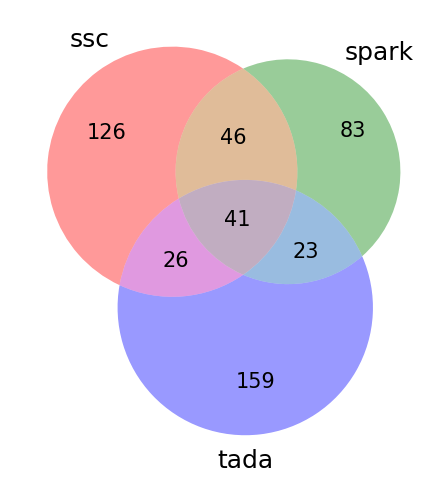

In [30]:
from matplotlib_venn import venn3, venn3_circles
ssc_str = [int(x.strip()) for x in open("../dat/genes/asd.ssc.entrez.list", "rt")]
spark_str = [int(x.strip()) for x in open("../dat/genes/asd.spark.entrez.list", "rt")]
tada_str = [int(x.strip()) for x in open("../dat/genes/asd.tada.list", "rt")]
plt.figure(dpi=150)
venn3([set(ssc_str), set(spark_str), set(tada_str)], 
      set_labels = ('ssc', 'spark', 'tada'))

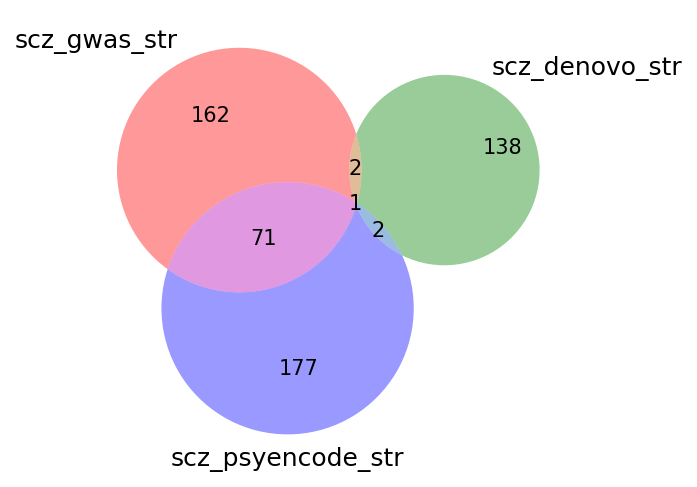

In [4]:
from matplotlib_venn import venn3, venn3_circles
scz_gwas = [int(x.strip()) for x in open("../dat/genes/scz.gwas.entrez.list", "rt")]
scz_denovo = [int(x.strip()) for x in open("../dat/genes/scz.denovo.entrez.list", "rt")]
scz_psyencode = [int(x.strip()) for x in open("../dat/genes/scz.psyencode.entrez.list", "rt")]
plt.figure(dpi=150)
venn3([set(scz_gwas), set(scz_denovo), set(scz_psyencode)], 
      set_labels = ('scz_gwas_str', 'scz_denovo_str', 'scz_psyencode_str'))

In [5]:
mouse_exp_df = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/match-features.csv")
mouse_exp_df.head(2)

,GENE,EXP,LENGTH.LOG2
0,1,0.064184,10.539159
1,2,0.270140,12.111462


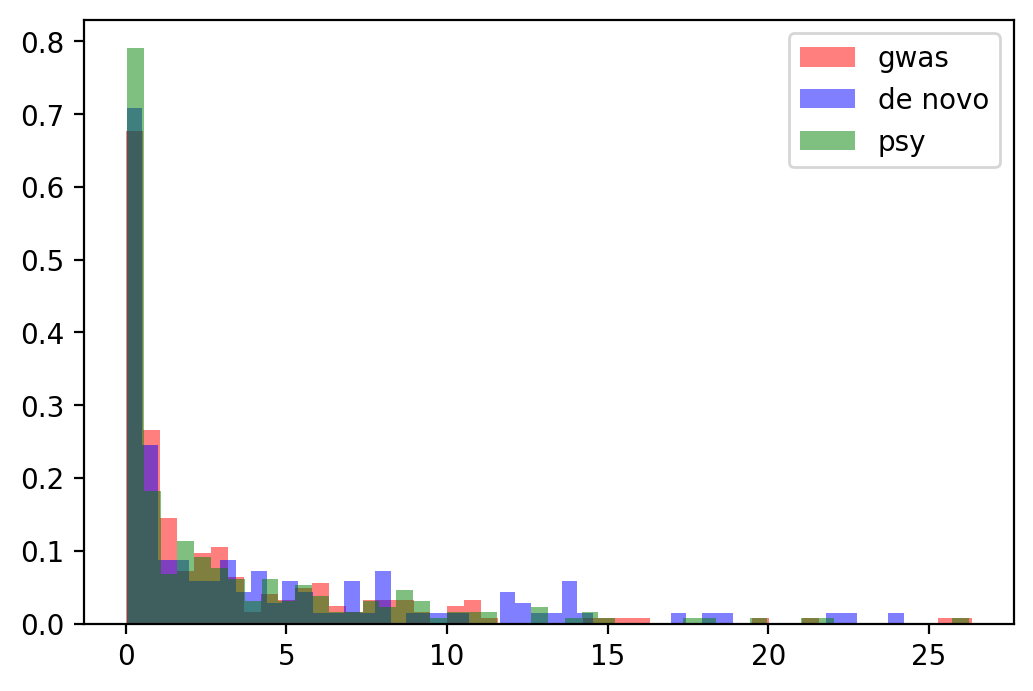

2.9311108518745113
3.9520805713141605
3.088526758970134
18446.5 0.06417464808155592


In [16]:
plt.figure(dpi=200)
plt.hist(mouse_exp_df[mouse_exp_df["GENE"].isin(scz_gwas)]["EXP"].values, 
         bins=50, color="red", label="gwas", alpha=.5, density=1)
plt.hist(mouse_exp_df[mouse_exp_df["GENE"].isin(scz_denovo)]["EXP"].values, 
         bins=50, color="blue", label="de novo", alpha=.5, density=1)
plt.hist(mouse_exp_df[mouse_exp_df["GENE"].isin(scz_psyencode)]["EXP"].values, 
         bins=50, color="green", label="psy", alpha=.5, density=1)
plt.legend()
plt.show()
for sett in [scz_gwas, scz_denovo, scz_psyencode]:
    print(np.mean(mouse_exp_df[mouse_exp_df["GENE"].isin(sett)]["EXP"].values))
    
t, p = scipy.stats.mannwhitneyu(
    mouse_exp_df[mouse_exp_df["GENE"].isin(scz_denovo)]["EXP"].values, 
    mouse_exp_df[mouse_exp_df["GENE"].isin(scz_gwas)]["EXP"].values, 
    alternative='greater')
print(t, p)

In [24]:
symbol_scz_gwas = [Entrez2Symbol[int(x)] for x in scz_gwas]
symbol_scz_denovo = [Entrez2Symbol[int(x)] for x in scz_denovo]
symbol_scz_psyencode = [Entrez2Symbol[int(x)] for x in scz_psyencode]

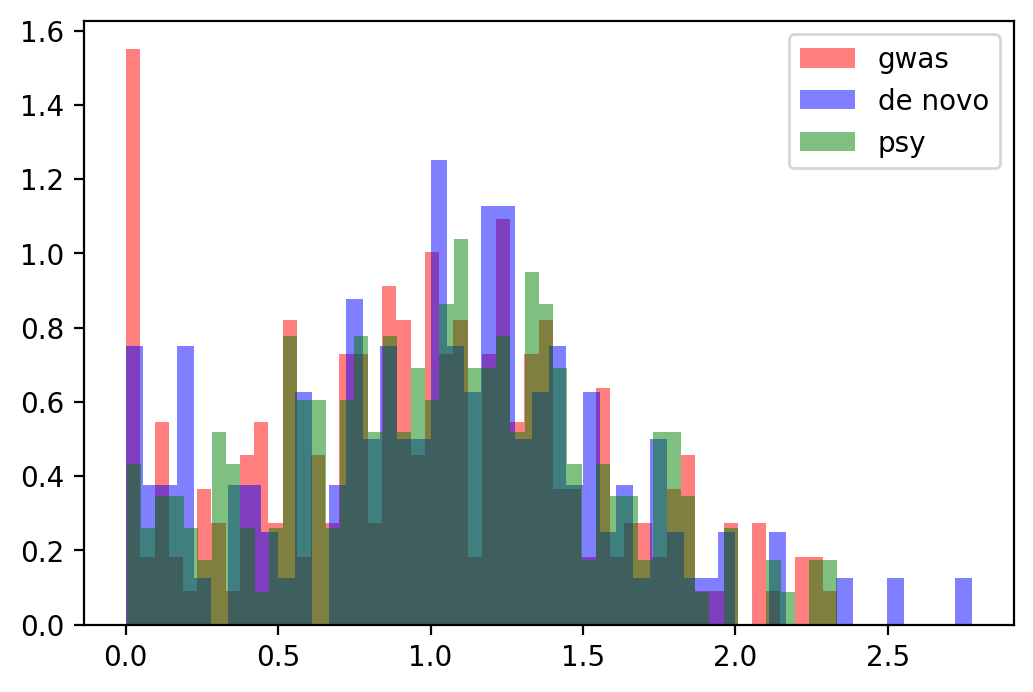

0.9881056298024783
1.0354942226727877
1.0401523550037222
17806.5 0.19602959193832625


In [32]:
gtex_exp_df = pd.read_csv("/Users/jiayao/Work/NB_proposal/dat/GTEx_SMTS_Gene_Exp.tsv", delimiter="\t")
plt.figure(dpi=200)
plt.hist(gtex_exp_df[gtex_exp_df["Description"].isin(symbol_scz_gwas)]["Brain"].values, 
         bins=50, color="red", label="gwas", alpha=.5, density=1)
plt.hist(gtex_exp_df[gtex_exp_df["Description"].isin(symbol_scz_denovo)]["Brain"].values, 
         bins=50, color="blue", label="de novo", alpha=.5, density=1)
plt.hist(gtex_exp_df[gtex_exp_df["Description"].isin(symbol_scz_psyencode)]["Brain"].values, 
         bins=50, color="green", label="psy", alpha=.5, density=1)
plt.legend()
plt.show()
for sett in [symbol_scz_gwas, symbol_scz_denovo, symbol_scz_psyencode]:
    print(np.mean(gtex_exp_df[gtex_exp_df["Description"].isin(sett)]["Brain"].values))
    
t, p = scipy.stats.mannwhitneyu(
    gtex_exp_df[gtex_exp_df["Description"].isin(symbol_scz_denovo)]["Brain"].values, 
    gtex_exp_df[gtex_exp_df["Description"].isin(symbol_scz_gwas)]["Brain"].values, 
    alternative='greater')
print(t, p)

In [32]:
ExpZscoreMat = "../dat/allen-mouse-exp/energy-zscore-conn-model.csv"
ExpZscoreMat = pd.read_csv(ExpZscoreMat, index_col="ROW")

In [43]:
asd_sib = [int(x.strip()) for x in open("../dat/genes/asd.sib.entrez.list", "rt")]
scz_gwas_qbias = pd.read_csv("dat/bias/scz.gwas.quantilescore.rank.tsv", delimiter="\t")
mean_top_50_case = np.mean(scz_gwas_qbias["Score"].values[:50])
res = []
for i in range(100):
    asd_sibrand = np.random.choice(asd_sib, 250)
    df = QuantileAVGScoring(ExpZscoreMat, asd_sibrand,
                  csv_fil=None)
    top_50_bias = [x[1] for x in df[:50]]
    mean_top_50_bias = np.mean(top_50_bias)
    diff = mean_top_50_case - mean_top_50_bias
    res.append(diff)

0.003383917659588731
0.05027741860196748


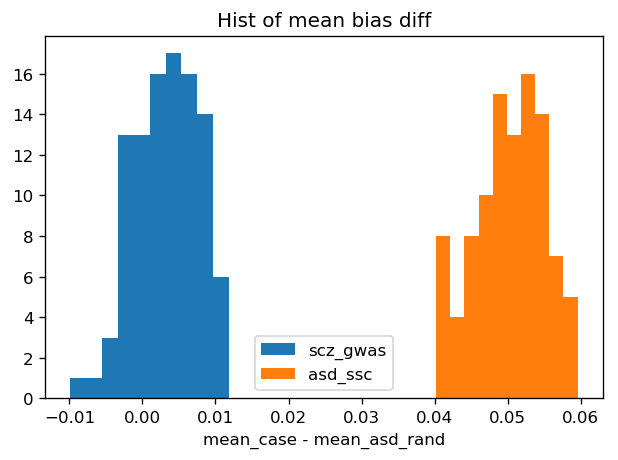

In [50]:
plt.figure(dpi=120)
plt.hist(res, label="scz_gwas")
plt.hist(res2, label="asd_ssc")
plt.title("Hist of mean bias diff")
print(np.mean(res))
print(np.mean(res2))
plt.xlabel("mean_case - mean_asd_rand")
plt.legend()
plt.show()

In [38]:
asd_sib = [int(x.strip()) for x in open("../dat/genes/asd.sib.entrez.list", "rt")]
scz_gwas_qbias = pd.read_csv("dat/bias/asd.ssc.quantilescore.rank.tsv", delimiter="\t")
mean_top_50_case = np.mean(scz_gwas_qbias["Score"].values[:50])
res2 = []
for i in range(100):
    asd_sibrand = np.random.choice(asd_sib, 250)
    df = QuantileAVGScoring(ExpZscoreMat, asd_sibrand,
                  csv_fil=None)
    top_50_bias = [x[1] for x in df[:50]]
    mean_top_50_bias = np.mean(top_50_bias)
    diff = mean_top_50_case - mean_top_50_bias
    res2.append(diff)

0.05027741860196748


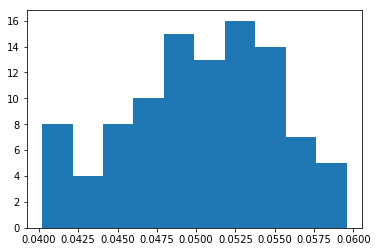

In [41]:
plt.hist(res2)
print(np.mean(res2))
plt.show()

In [35]:
MatchFeatures = pd.read_csv("dat/match-features.csv",index_col="GENE")
# Annotate quntiles
MatchFeatures = MatchFeatures.sort_values("EXP")
count = 0
for g, row in MatchFeatures.iterrows():
    count += 1
    quntitle = count/MatchFeatures.shape[0]
    MatchFeatures.loc[g, "ExpQ"] = quntitle
MatchFeatures = MatchFeatures.sort_values("LENGTH.LOG2")
count = 0
for g, row in MatchFeatures.iterrows():
    count += 1
    quntitle = count/MatchFeatures.shape[0]
    MatchFeatures.loc[g, "LenQ"] = quntitle
MatchFeatures.head(2)

,EXP,LENGTH.LOG2,ExpQ,LenQ
GENE,,,,
10975,11.873905,7.417853,0.95645,0.000064
84987,4.420141,7.442943,0.82516,0.000128


In [209]:
gene = 7273
exp = MatchFeatures.loc[gene, "EXP"]
expq = MatchFeatures.loc[gene, "ExpQ"]
lower = max(0, expq - r)
upper = min(1, expq + r)
quntiles = MatchFeatures[(MatchFeatures["ExpQ"]>=lower) & \
                        (MatchFeatures["ExpQ"]<=upper)]
quntiles = quntiles[~quntiles.index.isin(asd_ssc_genes)]
dat = []
for g, row in quntiles.iterrows():
    sample = dict(row)
    sample["GENE"] = g
    dat.append(sample)
match = np.random.choice(dat, 1000, p=assignProb([x["ExpQ"] for x in dat]))
write_match(gene, match, Dir)

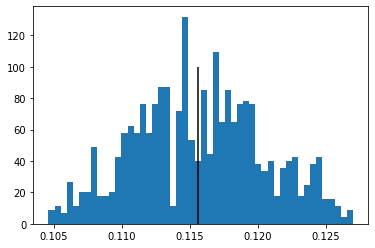

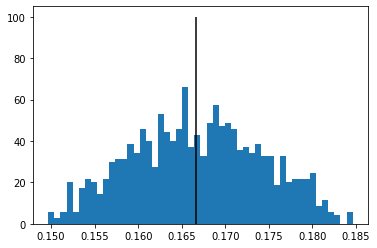

In [211]:
plt.hist([x["EXP"] for x in match], bins=50, density=1)
plt.vlines(x=MatchFeatures.loc[gene,"EXP"], ymin=0, ymax=100)
plt.show()
plt.hist([x["ExpQ"] for x in match], bins=50, density=1)
plt.vlines(x=MatchFeatures.loc[gene,"ExpQ"], ymin=0, ymax=100)
plt.show()

In [219]:
asd_ssc_genes = loadgenelist("../dat/genes/asd.ssc.entrez.list")
r = 0.02
Dir = "dat/Match/asd_ssc_match_genes"
for gene in asd_ssc_genes:
    if gene not in MatchFeatures.index:
        continue
    exp = MatchFeatures.loc[gene, "EXP"]
    expq = MatchFeatures.loc[gene, "ExpQ"]
    ## Modify r if necessary
    if expq - r < 0:
        r = expq - 0
    if expq + r > 1:
        r = 1 - expq
    lower = max(0, expq - r)
    upper = min(1, expq + r)
    quntiles = MatchFeatures[(MatchFeatures["ExpQ"]>=lower) & \
                            (MatchFeatures["ExpQ"]<=upper)]
    quntiles = quntiles[~quntiles.index.isin(asd_ssc_genes)]
    dat = []
    for g, row in quntiles.iterrows():
        sample = dict(row)
        sample["GENE"] = g
        dat.append(sample)
    match = np.random.choice(dat, 1000, p=assignProb([x["ExpQ"] for x in dat]))
    write_match(gene, match, Dir)

In [220]:
# Check kernel
gene = 7273
matched_genes = loadgenelist("%s/%d.match.csv"%(Dir, gene))
exps = []
q_exps = []
for g in matched_genes:
    exps.append(MatchFeatures.loc[g, "EXP"])
    q_exps.append(MatchFeatures.loc[g, "ExpQ"])

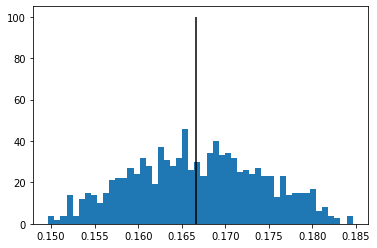

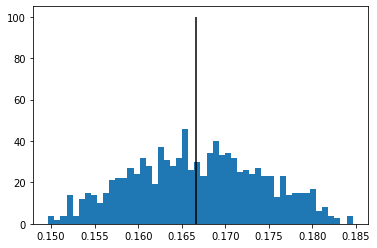

In [221]:
plt.hist(q_exps,bins=50)
plt.vlines(x=MatchFeatures.loc[gene,"ExpQ"], ymin=0, ymax=100)
plt.show()
plt.hist(q_exps,bins=50)
plt.vlines(x=MatchFeatures.loc[gene,"ExpQ"], ymin=0, ymax=100)
plt.show()

In [222]:
# How good are these matching in terms of exp ???
dat = []
for f in os.listdir(Dir):
    tmp = {}
    gene = int(f.split(".")[0])
    matched_genes = loadgenelist("%s/%s"%(Dir, f))
    exps = []
    q_exps = []
    for g in matched_genes:
        exps.append(MatchFeatures.loc[g, "EXP"])
        q_exps.append(MatchFeatures.loc[g, "ExpQ"])
    tmp["gene"] = gene
    tmp["exp"] = MatchFeatures.loc[gene,"EXP"]
    tmp["qexp"] = MatchFeatures.loc[gene,"ExpQ"]
    tmp["exps"] = exps
    tmp["qexps"] = q_exps
    dat.append(tmp)

In [223]:
dat.sort(key=lambda x:x["exp"])

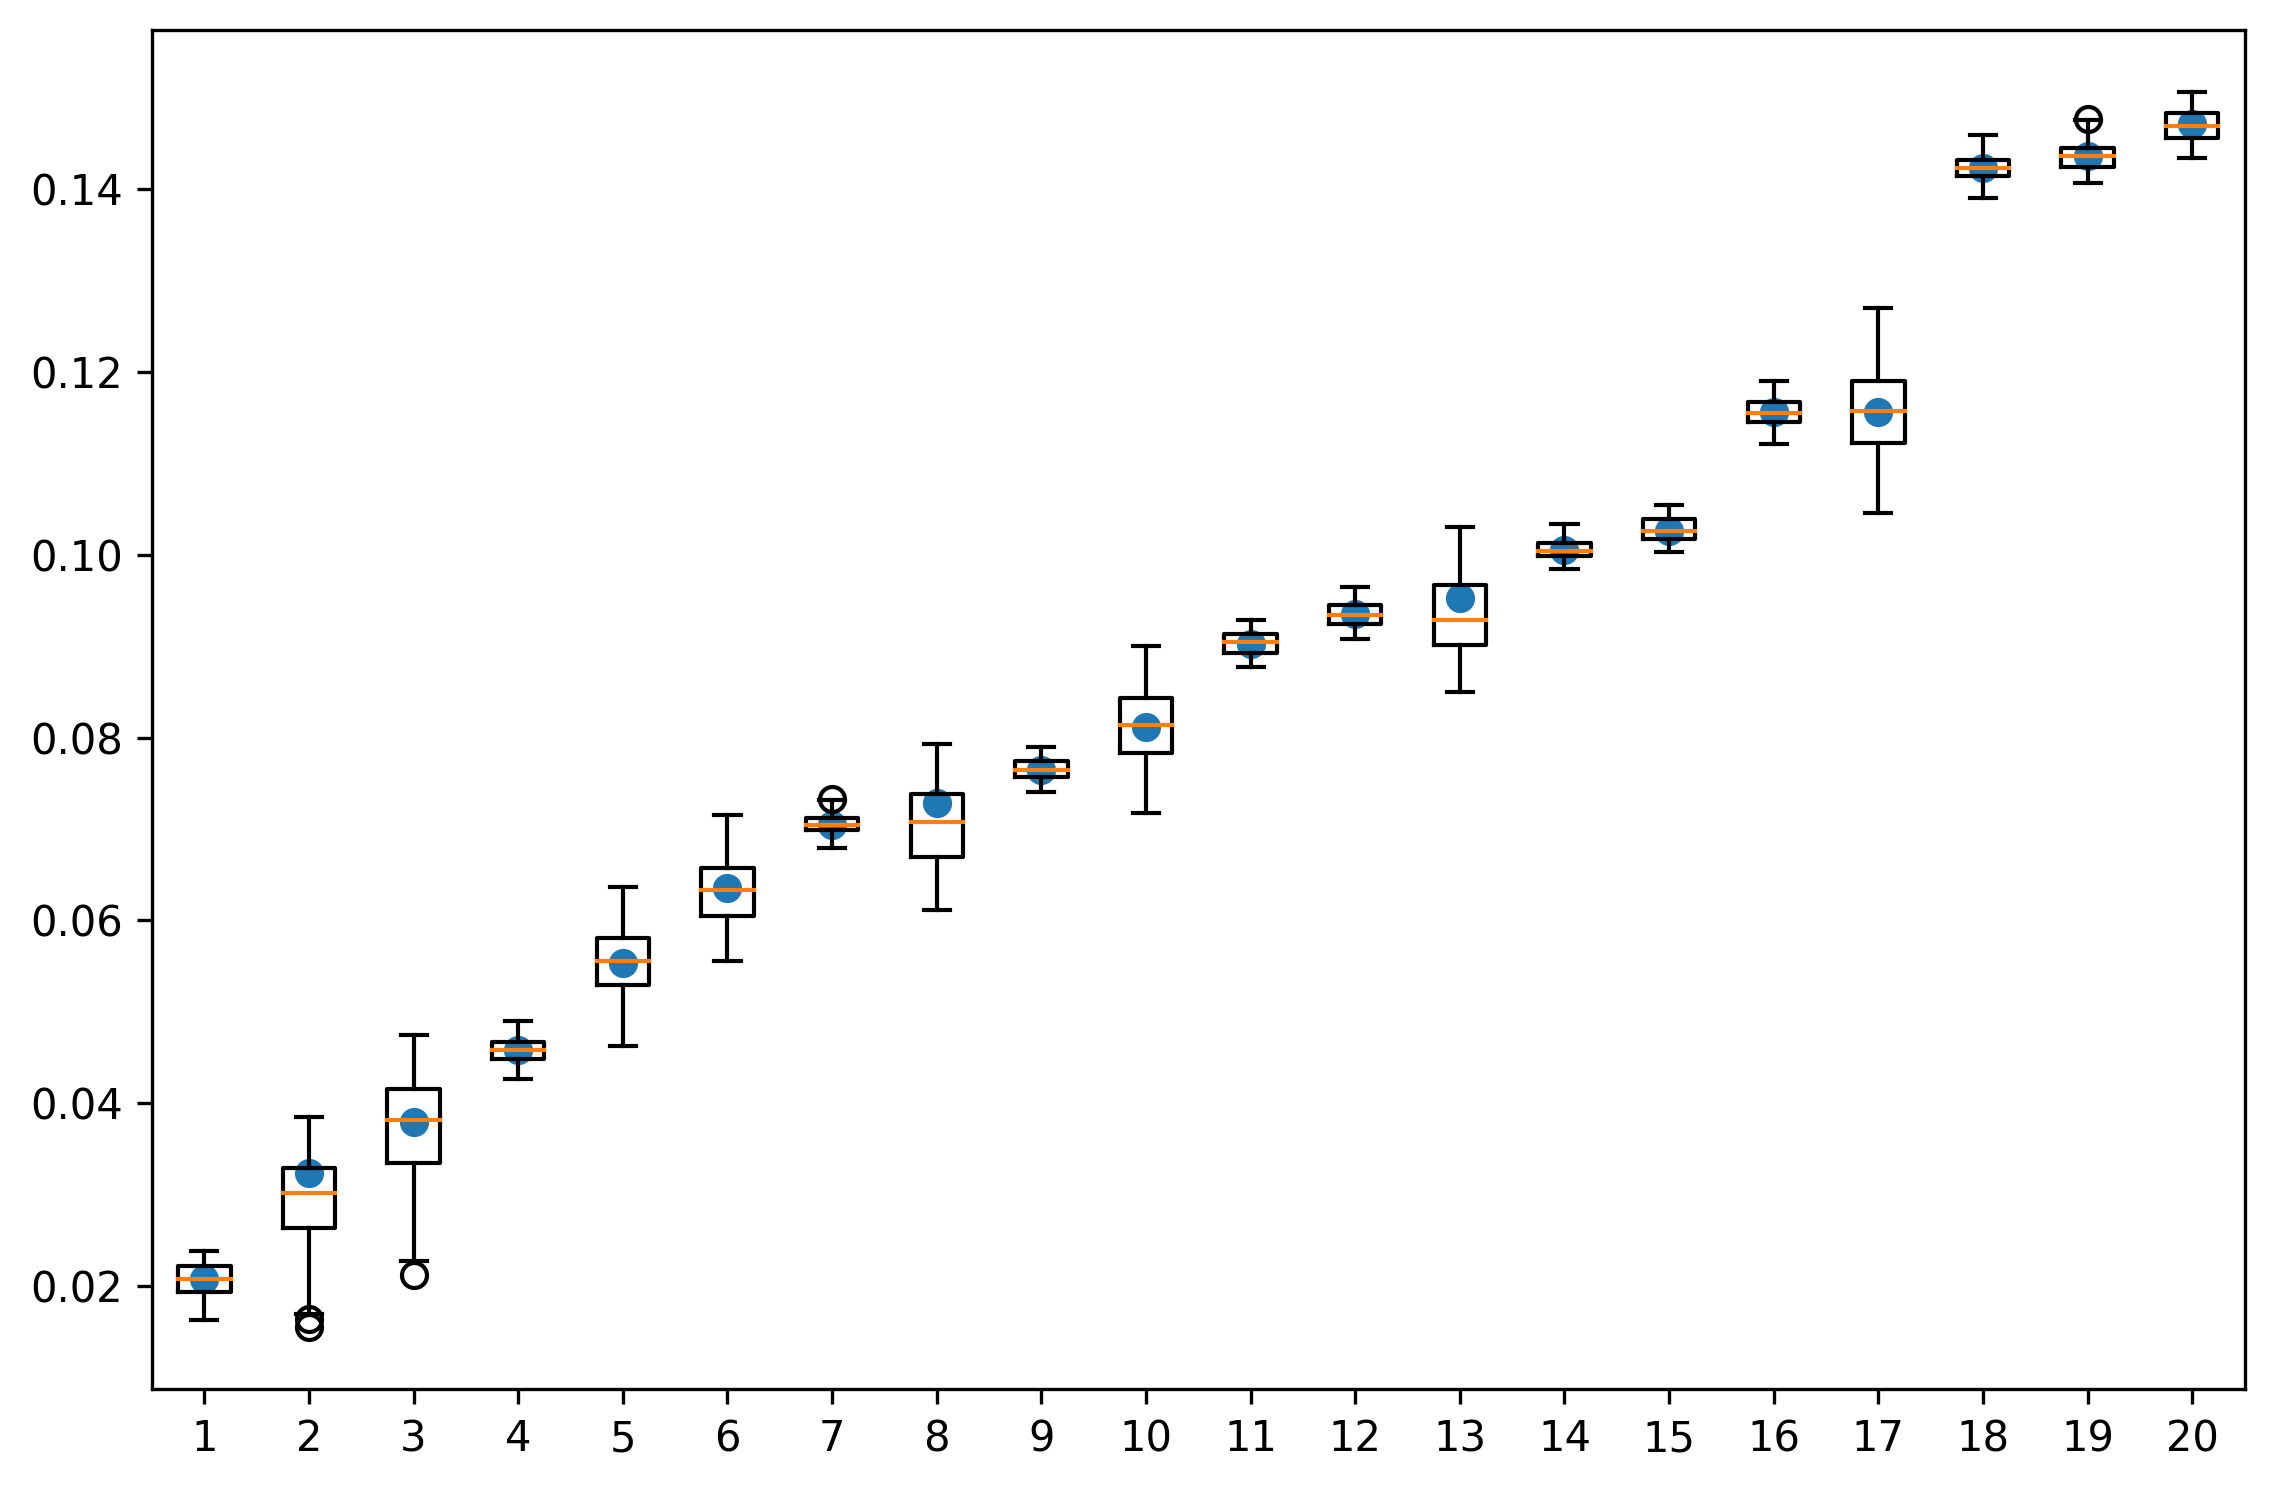

In [224]:
data_to_plot = [x["exps"] for x in dat[0:20]]
fig = plt.figure(1, figsize=(9, 6), dpi=300)
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
ax.scatter(range(1,20+1), [x["exp"] for x in dat[0:20]])
plt.show()

In [217]:
dat[16]["gene"]

7273

In [218]:
dat[16]["exp"]

0.11563841971126801

In [225]:
dat.sort(key=lambda x:x["qexp"])

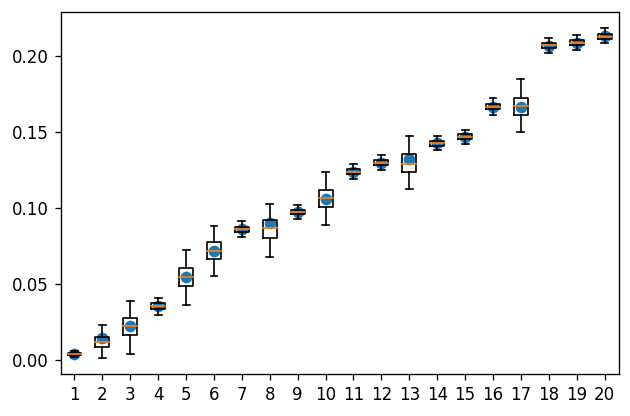

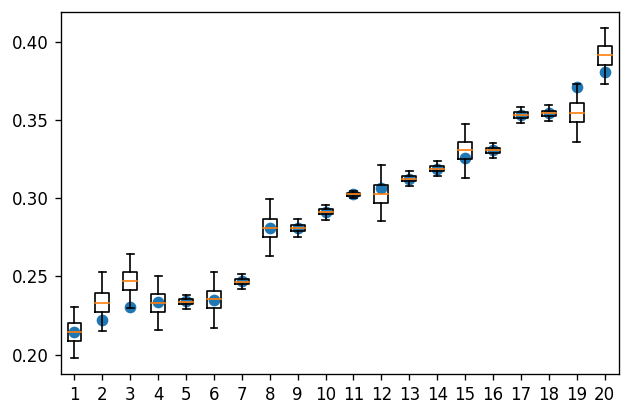

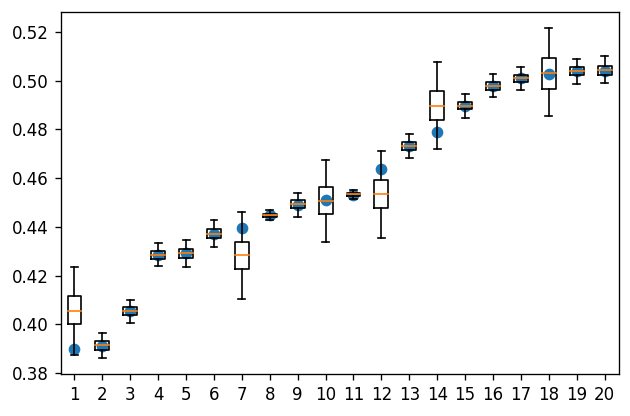

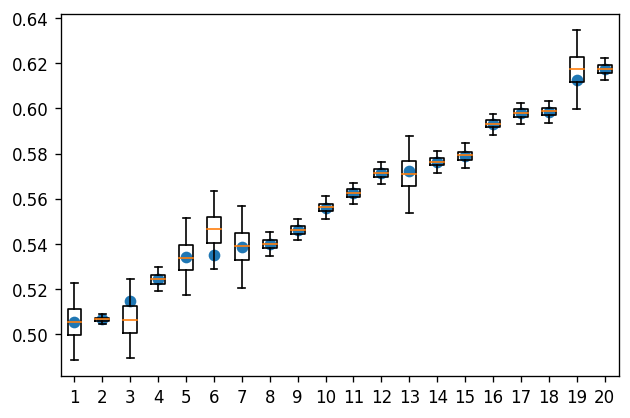

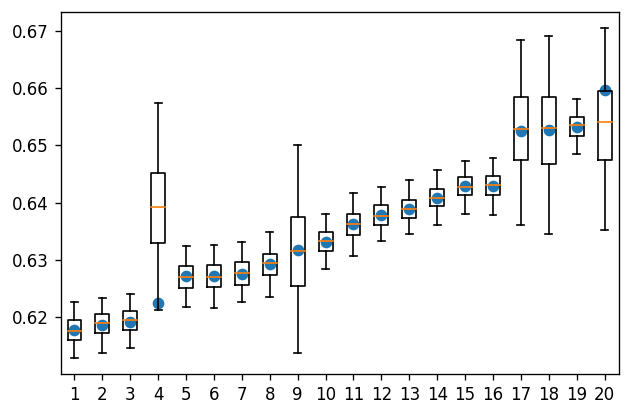

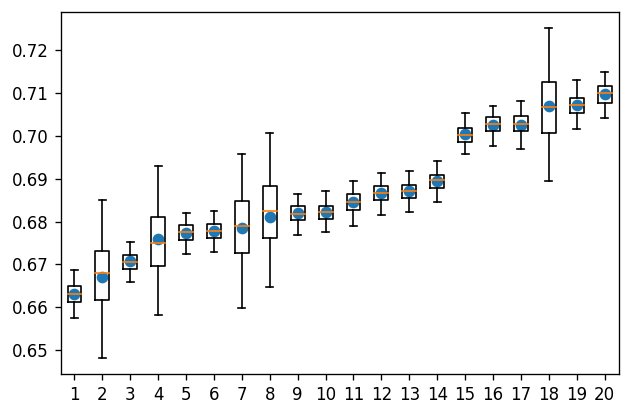

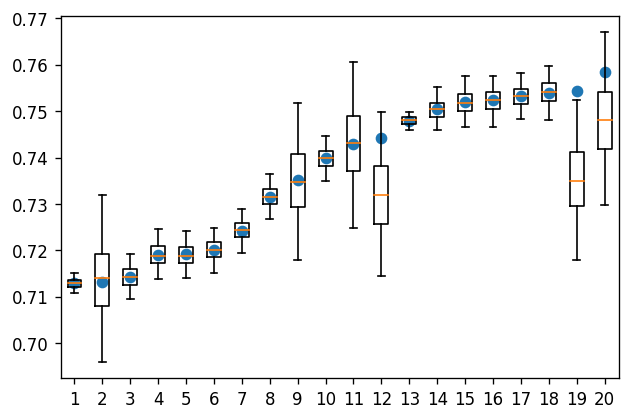

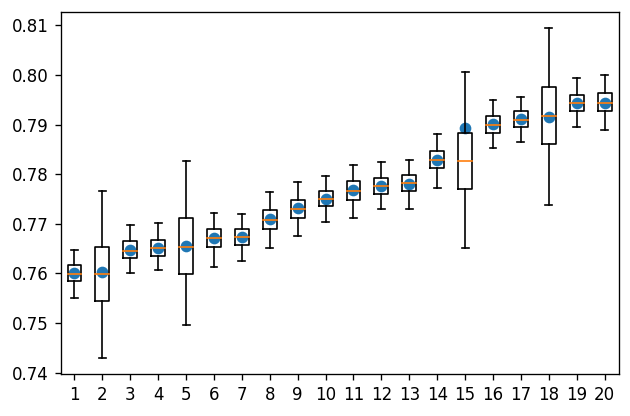

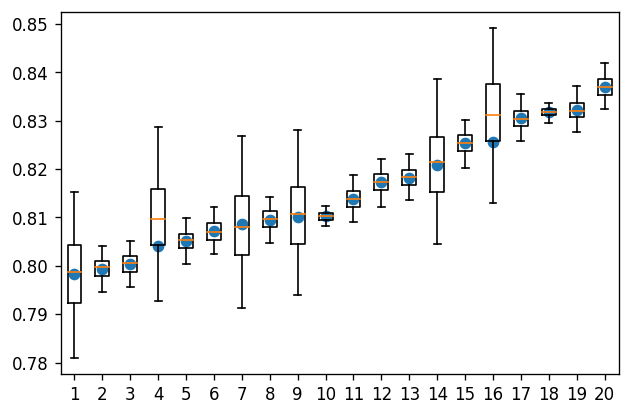

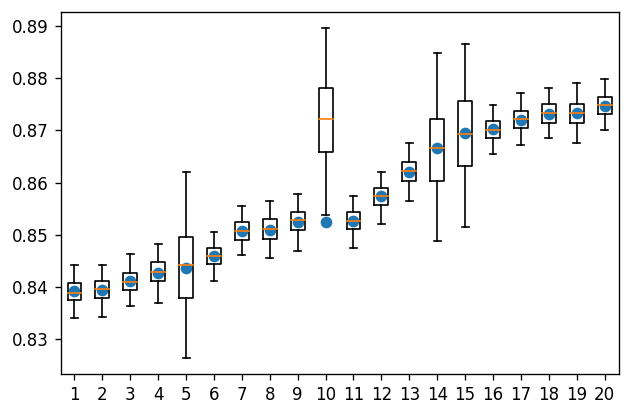

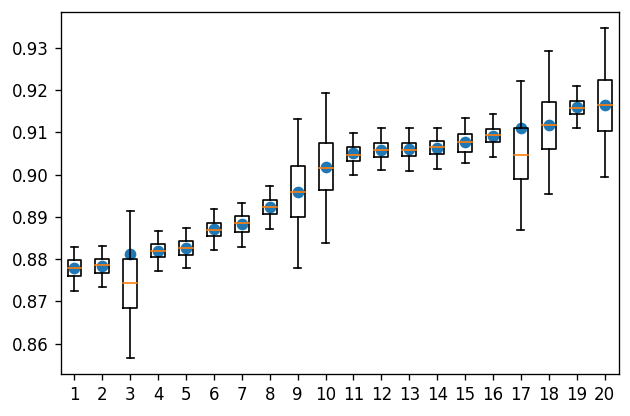

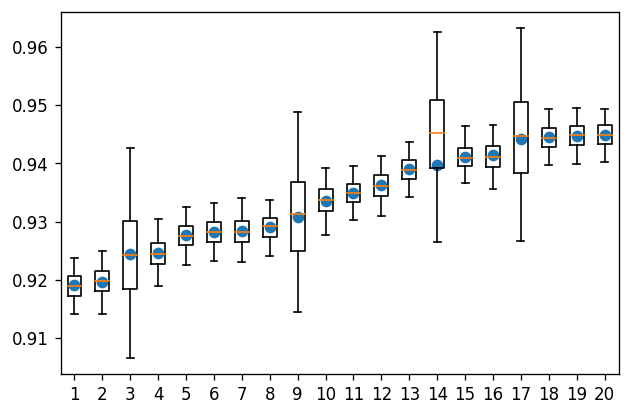

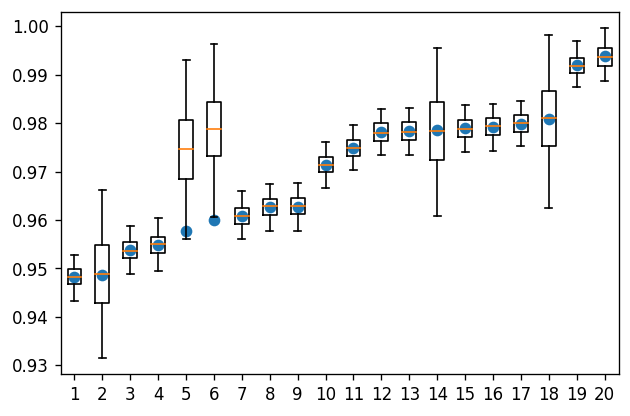

ValueError: x and y must be the same size

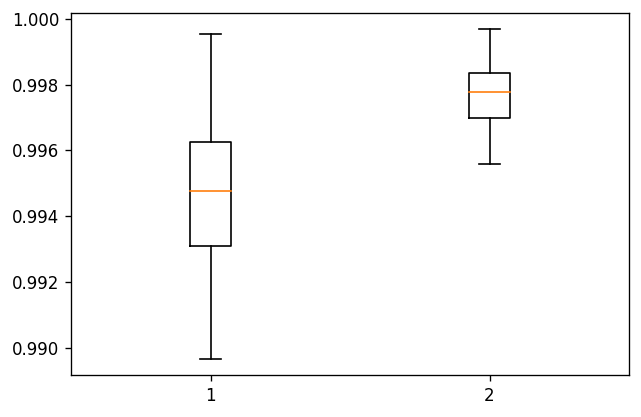

In [232]:
i = 0
while 1:
    if i > len(dat):
        break
    data_to_plot = [x["qexps"] for x in dat[i:i+20]]
    fig = plt.figure(1, figsize=(6, 4), dpi=120)
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)
    ax.scatter(range(1,21), [x["qexp"] for x in dat[i:i+20]])
    plt.show()
    i += 20

In [59]:
### Combine SingleGene bias
files = "/Users/jiayao/Work/ASD_Circuits/src/dat/bias/single_gene_spark_zmatch/spark.zmatch.single.gene.list"
dfs = []
for f in open(files, 'rt'):
    f=f.strip()
    df = pd.read_csv(f)
    df.head(2)
    cols = df.columns.values
    cols[0] = "STR"
    df.colums = cols
    df = df.set_index("STR") 
    dfs.append(df)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


In [60]:
ddd = dfs[0].join(dfs[1:])

In [61]:
ddd.to_csv("dat/bias/asd.spark.zmatch.sg.csv")

In [47]:
ddd.shape

(213, 98)

In [21]:
df.head(2)

,10522
STR,
Anterior_amygdalar_area,NaN
Anterior_cingulate_area_dorsal_part,0.400004


In [37]:
from scipy.stats import poisson
mean_depth = 40
require_depth = 20
1 - poisson.pmf(require_depth, mean_depth)

0.9998080023409531

## Expression Normalize by Neuron Count

In [3]:
ExpMat = "../dat/allen-mouse-exp/energy-conn-model.csv"
ExpMat = pd.read_csv(ExpMat, index_col="ROW")

In [26]:
def modify_str(x):
    x = re.sub("[()]", "", x)
    x = re.sub("-", "_", x)
    x = re.sub("reunions", "reuniens", x)
    x = "_".join(x.split(" "))
    return x

cell_comp = pd.read_csv("../dat/cell_composition/Cell_Atlas_for_the_Mouse_brain_1.csv", index_col="Regions")
STRs = cell_comp.index.values
STRs = [modify_str(x) for x in STRs]
cell_comp.index = STRs

In [27]:
cell_comp.head(10)

,Cells,Neurons,Glia,Excitatory,Inhibitory,Modulatory,Astrocytes,Oligodendrocytes,Microglia
root,111080000,71760000,39320000,65729437,5623818,406745,6116949,20946065,12256986
Basic_cell_groups_and_regions,104269365,71760000,32509365,65729437,5623818,406745,5172719,16694501,10642145
Cerebrum,42954307,25341736,17612571,21374196,3829654,137886,2681289,8644110,6287172
Cerebral_cortex,36851649,22153353,14698296,19695432,2351291,106630,2133711,6885189,5679396
Cortical_plate,35649755,21485755,14164000,19097897,2286513,101345,2056232,6527709,5580059
Isocortex,19845690,10273660,9572030,8966944,1242948,63768,1148184,4359847,4063999
Frontal_pole_cerebral_cortex,44816,27742,17074,5398,22179,165,438,5886,10750
Frontal_pole_layer_1,29660,17248,12412,0,17139,109,389,4709,7314
Frontal_pole_layer_2/3,15156,10494,4662,5398,5040,56,49,1177,3436
Somatomotor_areas,3151042,1456531,1694511,1235407,206861,14263,238853,772017,683641


In [28]:
strs = [l.strip() for l in open("dat/213_structures.txt", 'r')]

In [29]:
print(set(strs).difference(set(cell_comp.index.values)))

set()


In [6]:
phenotypeDF = pd.read_excel("/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_1.xlsx")

In [8]:
phenotypeDF.head(2)

,familyId,collection,probandGender,siblingGender,SequencedAtCSHL,SequencedAtUW,SequencedAtYALE,motherRace,fatherRace,probandVIQ,...,fatherAgeInMonthsAtBirthOfProband,motherAgeInMonthsAtBirthOfSibling,fatherAgeInMonthsAtBirthOfSibling,prbRecLGDs,prbLGDs,prbMissense,prbSynonymous,sibLGDs,sibMissense,sibSynonymous
0,11542,ssc,F,F,NaN,"p1,s1",NaN,more-than-one-race,white,121.0,...,430.0,403.0,404.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,13736,ssc,M,M,"p1,s1",NaN,NaN,white,white,119.0,...,400.0,425.0,429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
IQGT70Fam = phenotypeDF[phenotypeDF["probandNVIQ"]>70]["familyId"].values
IQLE70Fam = phenotypeDF[phenotypeDF["probandNVIQ"]<=70]["familyId"].values

In [14]:
len(IQGT70Fam)

1851

In [15]:
nature13908_vars = "/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_2.xlsx"
all_var = pd.read_excel(nature13908_vars)
LGD = set(["noStart", "frame-shift", "nonsense", "noEnd", "no-frame-shift-newStop","splice-site"])
MIS = set(["missense"])
LGDMIS = set(["noStart", "frame-shift", "nonsense", "noEnd", "no-frame-shift-newStop","splice-site", "missense"])
SYN = set(["synonymous"])
InPro = set(["pMsM", "pMsF", "pFsF", "pF", "pM", "pFsM"])
coding_var = all_var[(all_var["inChild"].isin(InPro)) & (all_var["effectType"].isin(LGDMIS))]

coding_var.head(3)

,familyId,location,variant,vcfVariant,inChild,fromParent,effectGene,effectType,familyDescription,CSHL,YALE,UW,IossifovWE2012,EichlerWE2012,StateWE2012,EichlerTG2012
1,14320,3:127395222,sub(T->G),3:127395222:T:G,pF,NaN,ABTB1,noStart,pFsM,strong,NaN,NaN,NaN,NaN,NaN,NaN
10,13096,1:1890629,sub(C->T),1:1890629:C:T,pM,NaN,KIAA1751,missense,pMsM,strong,NaN,NaN,yes,NaN,NaN,NaN
13,13350,1:3385486,sub(C->T),1:3385486:C:T,pM,NaN,ARHGEF16,missense,pM,strong,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
##all_var[all_var["effectGene"]=="CHD8"]
IQGT70Vars = coding_var[coding_var["familyId"].isin(IQGT70Fam)]
IQLE70Vars = coding_var[coding_var["familyId"].isin(IQLE70Fam)]

In [62]:
SSC_pred = pd.read_excel("../dat/genes/pnas.1516376112.sd01.xlsx", sheet_name="ST1-genes-beautified", index_col = "gene")

In [63]:
SSC_pred.head(2)

,codingLen,codingLenInTarget,chromosome,set_FMRPTargets,set_PSD,set_Embryonic,set_ChromatinModifiers,set_EssentialGenes,set_HLA,set_Defensins,...,prior,GR_PUB_synonymous_oC,GR_PUB_missense_oC,GR_PUB_missense_eC,GR_PUB_LGDs_oC,GR_PUB_LGDs_eC,GR_PUB_LGDs_post,GR_PUBNOAUT_LGDs_oC,GR_PUBNOAUT_LGDs_eC,GR_PUBNOAUT_LGDs_post
gene,,,,,,,,,,,,,,,,,,,,,
ANKRD11,7992,7992,16,1,0,0,0,1,0,0,...,0.90,179,206,324.360067,0,10.454,1.0,0,7.824,1.0
LRP1,13635,13635,12,1,1,0,0,1,0,0,...,0.35,281,314,528.571905,1,15.010,1.0,0,11.180,1.0


In [64]:
def AggGenes(VarDF, GeneSymbol2Entrez, SSC_pred):
    Data = []
    Genes = list(set(VarDF["effectGene"].values))
    for gene in Genes:
        try:
            Entrez = int(GeneSymbol2Entrez[gene])
        except:
            print(gene, )
            continue
        geneDF = VarDF[VarDF["effectGene"]==gene]
        NLGD = geneDF[geneDF["effectType"]!="missense"].shape[0]
        NMIS = geneDF[geneDF["effectType"]=="missense"] .shape[0]
        FDR = SSC_pred.loc[gene, "GR_PUB_LGDs_post"]
        Data.append([Entrez, gene, NLGD, NMIS, FDR])
    DF = pd.DataFrame(data=Data, columns=["Entrez", "Gene", "dnLGD", "dnMis", "FDR"])
    return DF

In [66]:
IQGT70Vars.shape
SSC_IQGT70 = AggGenes(IQGT70Vars, GeneSymbol2Entrez, SSC_pred)
SSC_IQLE70 = AggGenes(IQLE70Vars, GeneSymbol2Entrez, SSC_pred)

LPHN2
MTHFS,ST20-MTHFS
NARG2
PCDHA9
KIR2DL2
PTPLAD1
KIAA1432
KIAA1967
ZSCAN30,ZNF397
CCBL2
HDGFRP2
ANKHD1-EIF4EBP3,ANKHD1
PAPL
ZAK
CARKD
TMEM14E
FAM134A
SRPR
EMR1
BAI1
GPR114
SPANXD,SPANXE
KIAA0195
SUV420H1
KIAA1751
C11orf85
GPR75-ASB3,ASB3
GPR98
C10orf137
AQPEP
KIAA1731
P2RY11,PPAN-P2RY11
PCDHA13
GPR112
C16orf13
SOGA2
ERBB2IP
DOM3Z
ADRBK2
C5orf54
PCDHB9
RAB43,ISY1-RAB43
KIAA1984
MTERFD2
KIAA1009
QTRTD1
PTGES3L,PTGES3L-AARSD1
UGT1A10,UGT1A8,UGT1A9,UGT1A4,UGT1A5,UGT1A6,UGT1A7,UGT1A1,UGT1A3
GLTSCR1L
NAPRT1
PCDHA2
PCDHB16
GCN1L1
PCNX
EPT1
BAI3
HMHA1
C4orf27
C9orf156
RLTPR
KIAA1432
PCDHB4
C1orf173
KIAA0195
PCDHA11
SUV420H1
GLTSCR2
CCDC169-SOHLH2,SOHLH2


In [67]:
SSC_IQGT70

,Entrez,Gene,dnLGD,dnMis,FDR
0,51127,TRIM17,1,0,0.007
1,3914,LAMB3,0,1,0.000
2,200035,NUDT17,1,0,0.000
3,55643,BTBD2,0,1,0.807
4,9397,NMT2,0,1,0.324
...,...,...,...,...,...
1298,5208,PFKFB2,1,0,0.000
1299,23774,BRD1,0,1,0.807
1300,4087,SMAD2,0,1,0.595
1301,6934,TCF7L2,1,0,0.236


In [68]:
SSC_IQLE70[SSC_IQLE70["Gene"]=="CHD8"]

,Entrez,Gene,dnLGD,dnMis,FDR
91,57680,CHD8,5,0,1.0


In [69]:
SSC_IQGT70[SSC_IQGT70["Gene"]=="CHD8"]

,Entrez,Gene,dnLGD,dnMis,FDR
774,57680,CHD8,2,0,1.0


In [57]:
IQLE70Vars.shape

(567, 16)

In [20]:
coding_var.shape

(2064, 16)

In [70]:
SSC_IQLE70.to_csv("../dat/genes/asd/ssc_LowIQ.csv", index=False)
SSC_IQGT70.to_csv("../dat/genes/asd/ssc_highIQ.csv", index=False)